SYDE 572 Lab 0 - Python Introduction<br>
Name: Charlie Fisher<br>
Date: Jan 19, 2023

In [104]:
import numpy as np
import matplotlib.pyplot as plt

In [105]:
"""
2D Gaussian pdf

This function creates the pdf for a 2D Gaussian random variable

:param np.array (nx1 vector) X1: range of x1 component
:param np.array (mx1 vector) X2: range of x2 component
:param np.array (2x1 vector) mean: the mean of the random variable
:param np.array (2x2 matrix) covariance: the covariance matrix of the random variable

:return: the pdf for the range of x1, x2
:rtype: np.array (nxm matrix)

Usage (Example):
    Y = gauss2d(np.arange(-3,3.1,0.1),np.arange(0,6.1,0.1),np.array([0, 3]), np.array([[1, 1], [1, 4]])
"""
def guass2d(X1: np.array, X2: np.array, mean: np.array, covariance: np.array) -> np.array:

    """Computes the Gaussian pdf at a particular point (x1, x2)"""
    def pdf(x1: float, x2: float) -> float:
        k = 2
        x = np.array([x1, x2])
        return np.exp(-0.5*(x - mean).T@covariance@(x - mean))/np.sqrt(np.power(2*np.pi, k) * np.linalg.det(covariance))

    Y = np.zeros((X1.shape[0], X2.shape[0]))
    for i, x1 in enumerate(X1):
        for j, x2 in enumerate(X2):
            Y[i, j] = pdf(x1, x2)
    return Y

Text(0.5, 0, '$p(x_1,x_2)$')

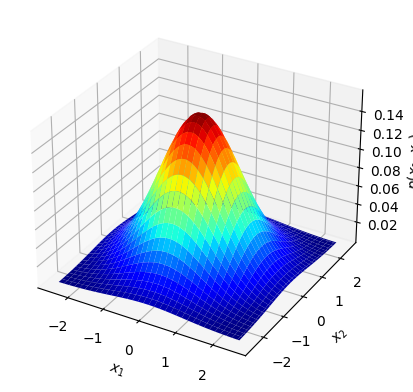

In [106]:
# generate distribution
mu = np.array([0, 0])
cov = np.array([[1, 0], [0, 1]])

x1 = np.arange(-2.5, 2.55, 0.05)
x2 = np.copy(x1)
Y = guass2d(x1, x2, mu, cov)
_, ax = plt.subplots(subplot_kw={'projection': '3d'})

# plot surface
X1, X2 = np.meshgrid(x1, x2)
ax.plot_surface(X1, X2, Y, cmap='jet')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$p(x_1,x_2)$')

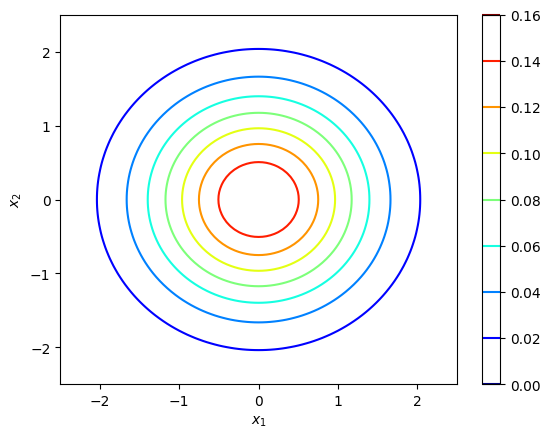

In [107]:
# plot contour
fig, ax = plt.subplots()
cnt = ax.contour(X1, X2, Y, cmap='jet')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
fig.colorbar(cnt)

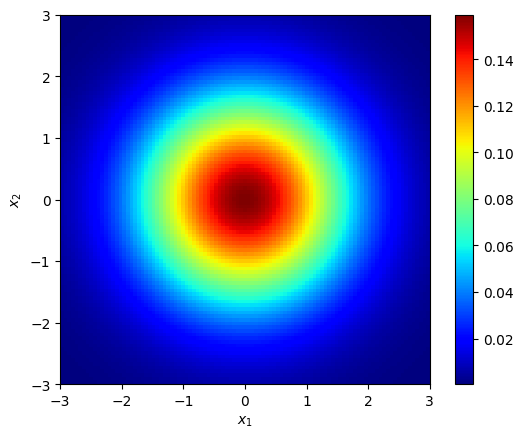

In [108]:
# plot heatmap
fig, ax = plt.subplots()
im = ax.imshow(Y, cmap='jet', origin='lower', extent=(-3, 3, -3, 3)) 
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
fig.colorbar(im)

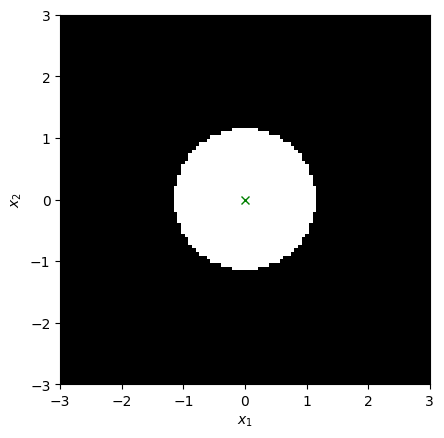

In [110]:
# plot region
region = Y > 0.1

fig, ax = plt.subplots()
ax.imshow(region, cmap='gray', origin='lower', extent=(-3, 3, -3, 3))
ax.plot(mu[1], mu[0], 'gx')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
plt.show()